In [8]:
from astropy.io import fits
import numpy as np
from __future__ import print_function
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery
from astropy import units as u
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

'''
f=h5py.File("decaps_sl_5band.00000.h5")
phot1=f['/photometry/pixel 1-10']
phot2=f['/photometry/pixel 1-3']
phot3=f['/photometry/pixel 1-4']

origmags=np.vstack((phot1['mag'],phot2['mag'],phot3['mag']))
errs=np.vstack((phot1['err'],phot2['err'],phot3['err']))
l=np.hstack((phot1['l'],phot2['l'],phot3['l'])).T
b=np.hstack((phot1['b'],phot2['b'],phot3['b'])).T

coords = SkyCoord(l*u.deg, b*u.deg, frame='galactic')
sfd = SFDQuery()
ebv = sfd(coords)

#origmags=phot['mag']
#errs=phot['err']
'''

'\nf=h5py.File("decaps_sl_5band.00000.h5")\nphot1=f[\'/photometry/pixel 1-10\']\nphot2=f[\'/photometry/pixel 1-3\']\nphot3=f[\'/photometry/pixel 1-4\']\n\norigmags=np.vstack((phot1[\'mag\'],phot2[\'mag\'],phot3[\'mag\']))\nerrs=np.vstack((phot1[\'err\'],phot2[\'err\'],phot3[\'err\']))\nl=np.hstack((phot1[\'l\'],phot2[\'l\'],phot3[\'l\'])).T\nb=np.hstack((phot1[\'b\'],phot2[\'b\'],phot3[\'b\'])).T\n\ncoords = SkyCoord(l*u.deg, b*u.deg, frame=\'galactic\')\nsfd = SFDQuery()\nebv = sfd(coords)\n\n#origmags=phot[\'mag\']\n#errs=phot[\'err\']\n'

In [ ]:
from astropy.io import fits
import numpy as np
from __future__ import print_function
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery
from astropy import units as u
import matplotlib.pyplot as plt
import h5py
%matplotlib inline


f=h5py.File("PS1_2MASS_beam.h5")
phot=f['/phot']
#origmags=np.vstack((phot1['mag'],phot2['mag'],phot3['mag']))
#errs=np.vstack((phot1['err'],phot2['err'],phot3['err']))
#l=np.hstack((phot1['l'],phot2['l'],phot3['l'])).T
#b=np.hstack((phot1['b'],phot2['b'],phot3['b'])).T


#coords = SkyCoord(l*u.deg, b*u.deg, frame='galactic')
#sfd = SFDQuery()
#ebv = sfd(coords)

origmags=phot['mags']
errs=phot['errs']

In [ ]:
origmags.shape

In [ ]:
ps1=origmags[:,0:5]
ps1.shape

In [ ]:
"""Adopted from ~dfink/decam/pro/colortransform_ps12decam.pro"""

import numpy


def ps12decam(psmag):
    """Convert PS1 grizy magnitudes to DECam ugrizY magnitudes."""

    coeff = numpy.array([[0.,       0.,       0.,       0.],        # u
                         [0.00613, -0.01028, -0.03604, -0.00062],   # g
                         [0.01140, -0.03222,  0.08435, -0.00495],   # r
                         [0.00829, -0.00566,  0.04171, -0.00904],   # i
                         [0.00898, -0.02824,  0.07690, -0.02583],   # z
                         [0.00572, -0.02840,  0.05992, -0.02332]],  # Y
                        dtype='f4')
    # coeff = numpy.array([[0,  0,        0,        0],        # u
    #                      [0, -0.07759,  0.02251, -0.00182],  # g
    #                      [0,  0.10512, -0.04559,  0.01438],  # r
    #                      [0,  0.02485,  0.00460,  0.00540],  # i
    #                      [0,  0.14644, -0.07077,  0.01694],  # z
    #                      [0,  0,        0,        0]],       # Y
    #                     dtype='f4')
    out = numpy.zeros((psmag.shape[0], coeff.shape[0]), dtype='f4')
    out[:, 0] = psmag[:, 0]  # u ~ g
    out[:, numpy.arange(5)+1] = psmag
    for i, coeff0 in enumerate(coeff):
        gi = psmag[:, 0] - psmag[:, 2]  # g-i
        out[:, i] -= numpy.polyval(coeff0[::-1], gi)
    return out


In [ ]:
decam_mags=ps12decam(ps1)

In [ ]:
finalmags=np.hstack((decam_mags[:,1:6],origmags[:,5:8]))

In [ ]:
hdulist=fits.open("find_decam_calib_fields.fits")
tbdata=hdulist[1].data
l=tbdata['l']
b=tbdata['b']
ra=tbdata['ra']
dec=tbdata['dec']

#coords = SkyCoord(l*u.deg, b*u.deg, frame='galactic')
#sfd = SFDQuery()
#ebv = sfd(coords)

In [ ]:
lint=np.around(l[::1000],1).astype(int)
bint=np.around(b[::1000],1).astype(int)

In [ ]:
data=np.vstack((lint,bint)).T

In [ ]:
unique_rows=np.vstack({tuple(row) for row in data})


In [ ]:
sorted_unique_rows=unique_rows[unique_rows[:,0].argsort()]

In [ ]:
np.save("Decam_Calibration_Fields",sorted_unique_rows)

In [ ]:
plt.scatter(sorted_unique_rows[-37:][:,0],sorted_unique_rows[-37:][:,1])

In [5]:
f['phot'][:]

array([([19.60199547, 19.1471405 , 19.03276825, 18.94348335, 18.87740707,  0.        ,  0.        ,  0.        ], [2.22816747e-02, 2.20076554e-02, 2.63038967e-02, 3.46105583e-02, 5.84812202e-02, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10], 0.07931326),
       ([22.32665062, 20.84940529, 20.43135071, 19.93231964, 19.76235008,  0.        ,  0.        ,  0.        ], [1.55020669e-01, 5.02443127e-02, 3.49248573e-02, 2.94425469e-02, 4.05132249e-02, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10], 0.08911291),
       ([22.04265022, 20.65934372, 20.87192917, 20.02739143, 18.54017448,  0.        ,  0.        ,  0.        ], [1.97108135e-01, 6.93012327e-02, 1.02911077e-01, 5.18876500e-02, 4.12128270e-02, 1.00000000e+10, 1.00000000e+10, 1.00000000e+10], 0.08536585),
       ...,
       ([23.57681656, 22.28143501, 21.54931259, 21.10403252, 21.12377739,  0.        ,  0.        ,  0.        ], [9.05525833e-02, 5.48525266e-02, 8.28140229e-02, 8.27697366e-02, 1.76477864e-01, 1.00000000e+10, 1.0000

In [19]:
mags,colors,median_ebv=read_colors("decaps_sl_5bands.h5",'g_DES r_DES i_DES z_DES Y_DES J_tm H_tm K_s_tm')

TypeError: dereddened_mags() takes exactly 2 arguments (3 given)

In [18]:

def read_colors(fname, bands, oversample=10, dset_name='/phot'):
    # Read h5 file
    f = h5py.File(fname, 'r')
    data = f[dset_name][:]
    f.close()
    
    # De-redden
    errs = data['err'][:]
    mags = dereddened_mags(data['mag'], data['EBV'], bands)
    
    # Filter out bad photometry
    idx = (
              np.all(np.isfinite(mags), axis=1)
            & np.all(np.isfinite(errs), axis=1)
            & np.all(errs < 0.5, axis=1)
          )
    
    # Filter out large reddenings
    idx &= (data['EBV'] < 0.5)
    
    mags = mags[idx]
    errs = errs[idx]
    
    # Resample photometry from errors
    m = []
    
    for i in xrange(oversample):
        dm = errs * np.random.normal(size=errs.shape, scale=1.)
        m.append(mags + dm)
    
    mags = np.concatenate(m, axis=0)
    colors = -np.diff(mags, axis=1)
    
    return mags,colors, np.median(data['EBV'])

In [10]:
import h5py
f=h5py.File("decaps_sl_5bands.h5")
phot=f['/phot']
origmags=phot['mag']
errs=phot['err']
ebv=phot['EBV']

Reddening vector: [1.061 0.581 0.378 0.159 0.272 0.278 0.188]
489485
489430
489848
489388
489793
489793
49963
50364
50319
50319
35321
35629
35581
35536
35568
23282
23519
23482
23448
23298
23346


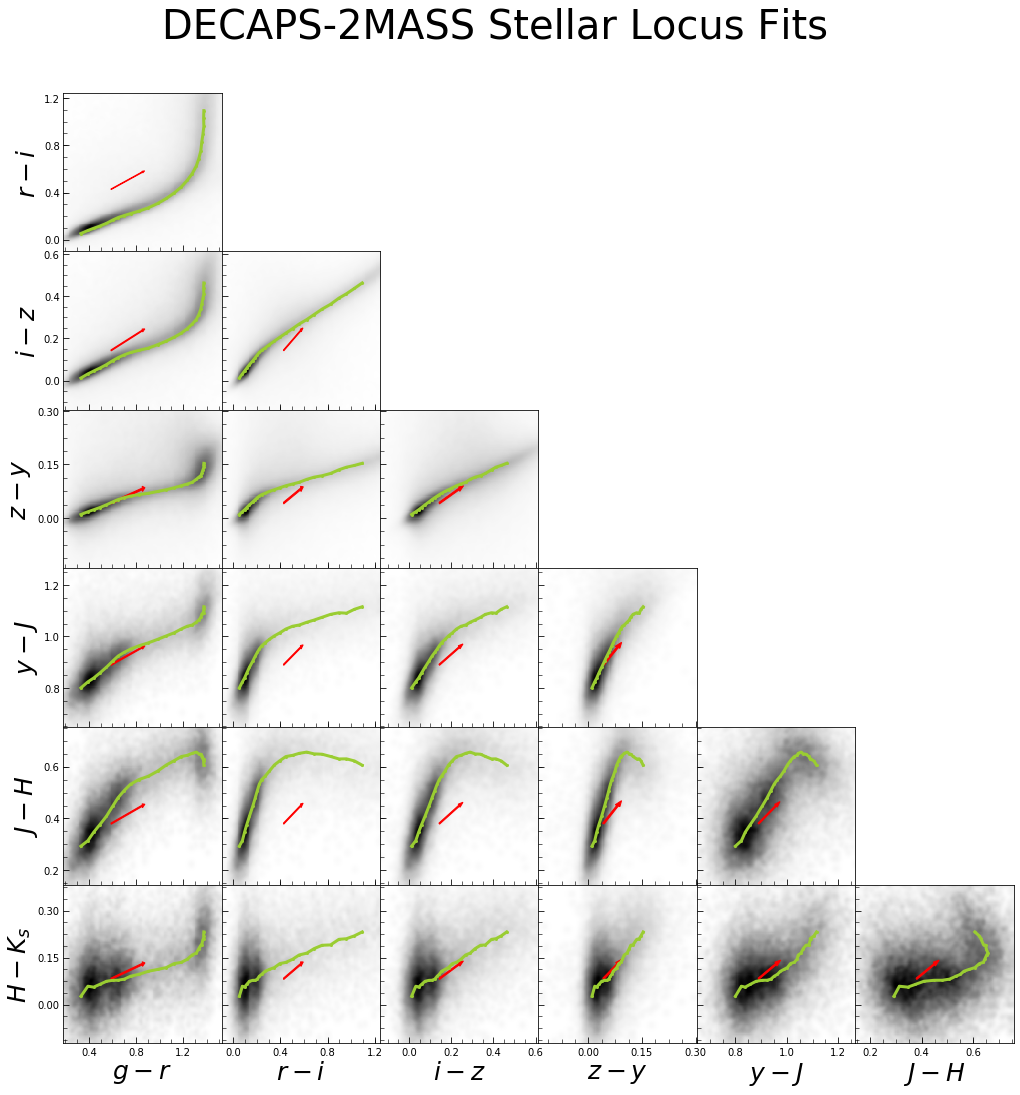

In [16]:
-

In [28]:
import h5py
n_stars=origmags.shape[0]
data = np.empty(n_stars, dtype=[('mag','f8',8),
                                ('err','f8',8), ('EBV','f8')])

data['mag'][:] = origmags[:]
data['err'][:]= errs
data['EBV'][:]= ebv
#data['err'][:] = errs[:]
#data['EBV'][:] = ebv

f = h5py.File("decaps_sl_5bands.h5",'w')
#f=h5py.File("baade.h5",'w')

ds_name = '/phot' 
ds = f.create_dataset(ds_name, data.shape, data.dtype)
ds[:] = data[:]

f.close()

In [ ]:
origmags.shape

In [ ]:
np.min(origmags)

In [ ]:
np.max(origmags)

In [ ]:
f=h5py.File("decaps_twomass_sl_phot.hdf5")

In [ ]:
f.keys()

In [ ]:
phot=f['/phot']

In [ ]:
phot['mag'].shape

In [39]:
r[1:-1,0][-1]

1.3701000000000001

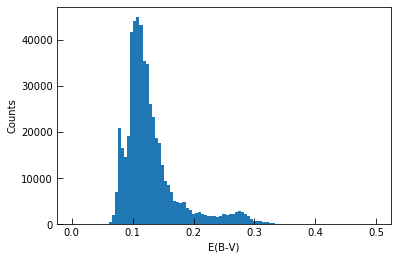

In [14]:
plt.hist(ebv,bins=np.linspace(0,0.5,100))
plt.xlabel("E(B-V)")
plt.ylabel("Counts")
plt.savefig("SL_Sample_Reddening.png")

In [9]:
ebv

array([ 0.07931326,  0.08911291,  0.08536585, ...,  0.11117988,
        0.11113591,  0.11175601], dtype=float32)